## Step 1: Load breast cancer dataset from sklean and split it as train and test sets.

### sklearn.datasets.load_breast_cancer()

--> Number of classes: 2 ['malignant', 'benign']

--> Total samples: 569 ['malignant' 212, 'benign' 357]

--> Dimensionality: 30

**Returns dictionary-like Bunch object with following attributes**

--> data: The ndarray of input data samples with a shape (569, 30)

--> target: The ndarray of classification target with a shape (569, )

--> feature_names: List of feature names

--> target_names: List of target class names



In [7]:
from sklearn.datasets import load_breast_cancer
dataset=load_breast_cancer()
print("Input features:",dataset.feature_names)
print("Target classes:",dataset.target_names)
x=dataset.data
y=dataset.target
print("Shape of Input treaining Data:",x.shape)
print("Shape of output treaining Data:",y.shape)

Input features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target classes: ['malignant' 'benign']
Shape of Input treaining Data: (569, 30)
Shape of output treaining Data: (569,)


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=37)
print("Training data input shape:",x_train.shape)
print("Training data input shape:",y_train.shape)
print("Test data input shape:",x_test.shape)
print("Test data input shape:",y_test.shape)

Training data input shape: (170, 30)
Training data input shape: (170,)
Test data input shape: (399, 30)
Test data input shape: (399,)


## Step 2: Build the model

### Import KNearestClassifier from sklearn.neighbors
--> Object creation: model = KNeighborsClassifier(n_neighbors) 

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn3=KNeighborsClassifier(n_neighbors=4)
knn3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

## Step 3: Test the model
### We can import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score functions from sklearn.metrics

In [10]:
y_pred=knn3.predict(x_test)


In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Confusion matrix\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Confusion matrix
 [[125  19]
 [ 28 227]]
Accuracy Score:  0.8822055137844611
Precision:  0.9227642276422764
Recall Score:  0.8901960784313725
F1 Score: 0.906187624750499


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_values=range(1,26,2)
train_accuracies=[]
test_accuracies=[]
for k in k_values:
   knn=KNeighborsClassifier(n_neighbors= k)
   knn.fit(x_train,y_train)
   train_accuracy=accuracy_score(y_train,knn.predict(x_train))
   train_accuracies.append(train_accuracy)
   test_accuracy=accuracy_score(y_test,knn.predict(x_test))
   test_accuracies.append(test_accuracy)

In [16]:
print("training accuracies:", train_accuracies)
print("test accuracies:", test_accuracies)

training accuracies: [1.0, 0.9470588235294117, 0.9411764705882353, 0.9352941176470588, 0.9352941176470588, 0.9411764705882353, 0.9411764705882353, 0.9411764705882353, 0.9411764705882353, 0.9352941176470588, 0.9352941176470588, 0.9352941176470588, 0.9352941176470588]
test accuracies: [0.899749373433584, 0.9047619047619048, 0.9072681704260651, 0.9022556390977443, 0.9022556390977443, 0.899749373433584, 0.8972431077694235, 0.8972431077694235, 0.8947368421052632, 0.8872180451127819, 0.8872180451127819, 0.8897243107769424, 0.8947368421052632]


Text(0.5, 1.0, 'finding k values')

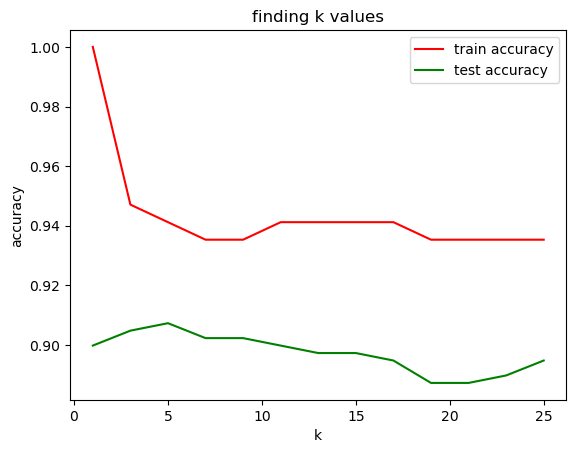

In [17]:
import matplotlib.pyplot as plt
plt.plot(k_values, train_accuracies, color="red")
plt.plot(k_values, test_accuracies, color="green")
plt.legend(["train accuracy", "test accuracy"])
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title("finding k values")